<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/classification_svd_basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

svd & least square residual

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.T
x_test = x_test.T
print(x_train.shape)
print(x_test.shape)

(784, 60000)
(784, 10000)


In [ ]:
x_train_list = []
for k in range(10):
    components = np.where(y_train == k)[0]
    x_train_list.append(x_train[:, components])

In [ ]:
U_list = []
for k in range(10):
    U, D, V = np.linalg.svd(x_train_list[k])
    U_list.append(U)

In [ ]:
mse_train = []
for r in range(40):
    n_train = x_train.shape[1]
    y_train_predict = y_train.copy()
    for i in range(0, n_train, 15):
        x = x_train[:, i]
        residual_list = np.ones((10))
        for k in range(10):
            U_r = U_list[k][:, :r+1]
            alpha = np.dot(U_r.T, x)
            residual = np.linalg.norm(x - np.dot(U_r, alpha))
            residual_list[k] = residual

        y_train_predict[i] = np.argmin(residual_list)
        mse_train.append(np.mean(np.square(y_train - y_train_predict)))



In [ ]:
mse_test = []
for r in range(40):
    n_test = x_test.shape[1]
    y_test_predict = y_test.copy()
    for i in range(0, n_test, 15):
        x = x_test[:, i]
        residual_list = np.ones((10))
        for k in range(10):
            U_r = U_list[k][:, :r+1]
            alpha = np.dot(U_r.T, x)
            residual = np.linalg.norm(x - np.dot(U_r, alpha))
            residual_list[k] = residual

        y_test_predict[i] = np.argmin(residual_list)
        mse_test.append(np.mean(np.square(y_test - y_test_predict)))


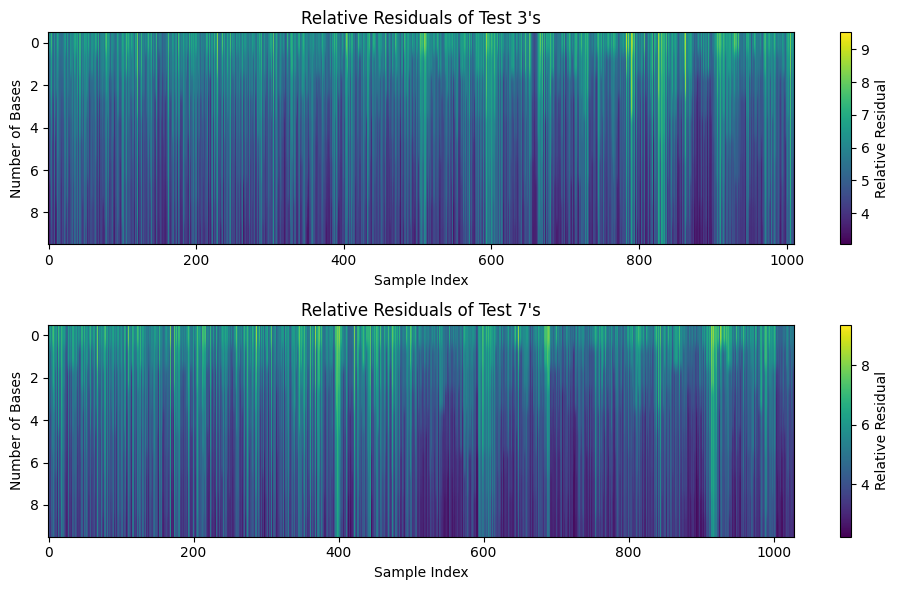

In [ ]:
import matplotlib.pyplot as plt

# Select samples of test 3's and 7's
test_3_indices = np.where(y_test == 3)[0]
test_7_indices = np.where(y_test == 7)[0]

n_bases = 10

# Calculate relative residuals for test 3's
relative_residues_3 = np.zeros((n_bases, len(test_3_indices)))
for i, idx in enumerate(test_3_indices):
    x = x_test[:, idx]
    for r in range(n_bases):
        U_r = U_list[3][:, :r+1]
        alpha = np.dot(U_r.T, x)
        x_hat = np.dot(U_r, alpha)
        relative_residues_3[r, i] = np.linalg.norm(x - x_hat)

# Calculate relative residuals for test 7's
relative_residues_7 = np.zeros((n_bases, len(test_7_indices)))
for i, idx in enumerate(test_7_indices):
    x = x_test[:, idx]
    for r in range(n_bases):
        U_r = U_list[7][:, :r+1]
        alpha = np.dot(U_r.T, x)
        x_hat = np.dot(U_r, alpha)
        relative_residues_7[r, i] = np.linalg.norm(x - x_hat)

# Plot relative residuals for test 3's
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title('Relative Residuals of Test 3\'s')
plt.imshow(relative_residues_3, cmap='viridis', aspect='auto')
plt.xlabel('Sample Index')
plt.ylabel('Number of Bases')
plt.colorbar(label='Relative Residual')

# Plot relative residuals for test s's
plt.subplot(2, 1, 2)
plt.title('Relative Residuals of Test 7\'s')
plt.imshow(relative_residues_7, cmap='viridis', aspect='auto')
plt.xlabel('Sample Index')
plt.ylabel('Number of Bases')
plt.colorbar(label='Relative Residual')

plt.tight_layout()
plt.show()

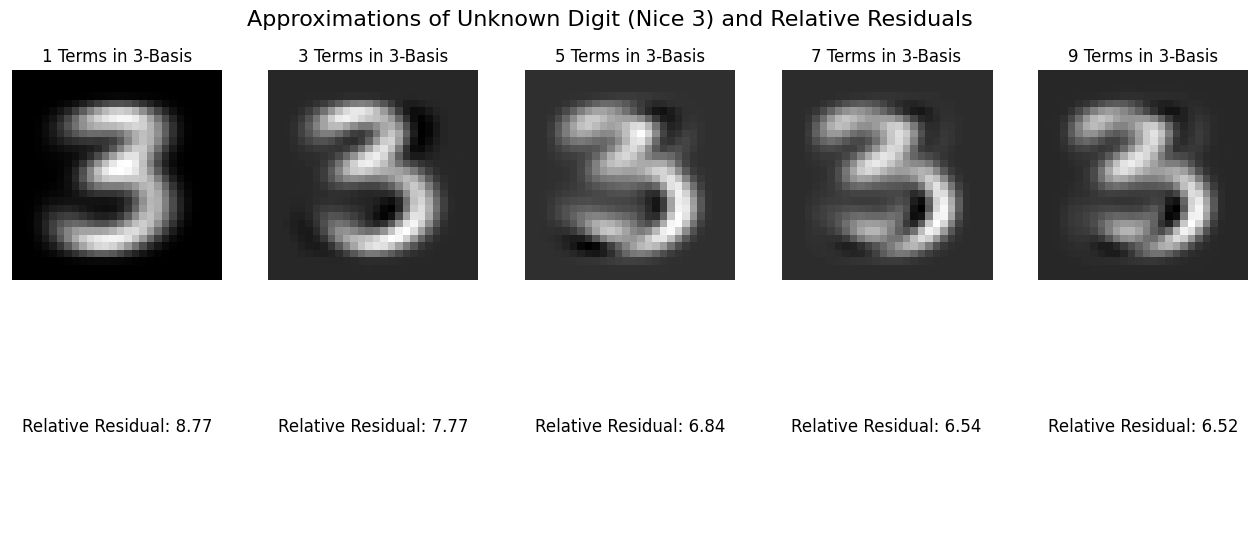

In [ ]:
import matplotlib.pyplot as plt

# Pick an unknown "3" digit from the test set
unknown_digit_indices = np.where(y_test == 3)[0]
unknown_digit = x_test[:, unknown_digit_indices[0]]

terms_list = [1, 3, 5, 7, 9]
fig, axs = plt.subplots(2, len(terms_list), figsize=(16, 6))

for i, r in enumerate(terms_list):
    # Calculate the approximation using r terms in the 3-basis
    U_r = U_list[3][:, :r]
    alpha = np.dot(U_r.T, unknown_digit)
    approximated_digit = np.dot(U_r, alpha)

    # Plot the approximated digit
    axs[0, i].imshow(approximated_digit.reshape(28, 28), cmap='gray')
    axs[0, i].set_title(f"{r} Terms in 3-Basis")
    axs[0, i].axis('off')

    # Calculate the relative residual
    residual = np.linalg.norm(unknown_digit - approximated_digit)
    axs[1, i].text(0.5, 0.5, f'Relative Residual: {residual:.2f}', ha='center', va='center', fontsize=12)
    axs[1, i].axis('off')

plt.suptitle("Approximations of Unknown Digit (Nice 3) and Relative Residuals", fontsize=16)
plt.show()

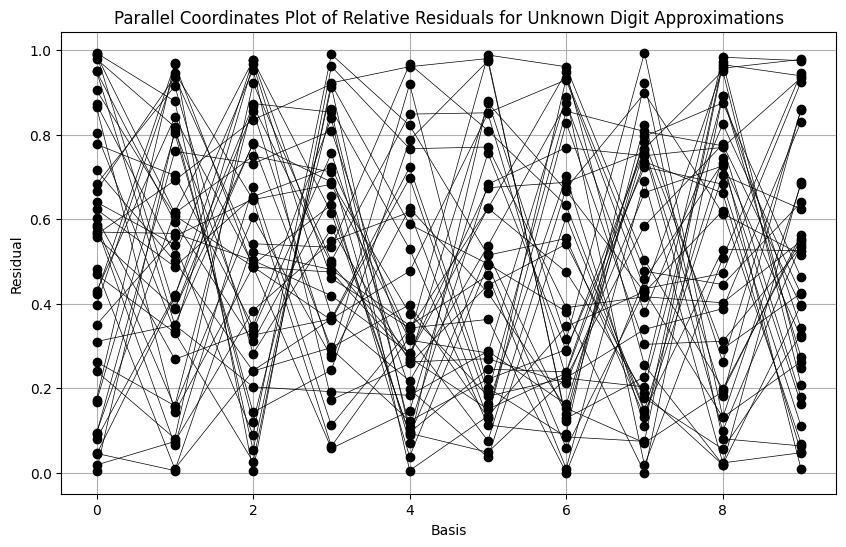

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mse_test is already defined and contains the residuals
# For demonstration, let's create a dummy mse_test array
# Replace this with your actual mse_test data
mse_test = np.random.rand(40, 10)  # 40 test points, 5 terms in 3-basis

terms_list = [0,1, 2,3,4, 5,6, 7,8, 9]
residuals = np.array(mse_test).reshape(-1, len(terms_list))  # Reshape to get residuals for each test point

plt.figure(figsize=(10, 6))
for i in range(residuals.shape[0]):
    plt.plot(terms_list, residuals[i], marker='o', color='black', linewidth=0.5)

plt.xlabel('Basis')
plt.ylabel('Residual')
plt.title('Parallel Coordinates Plot of Relative Residuals for Unknown Digit Approximations')
plt.grid(True)
plt.show()

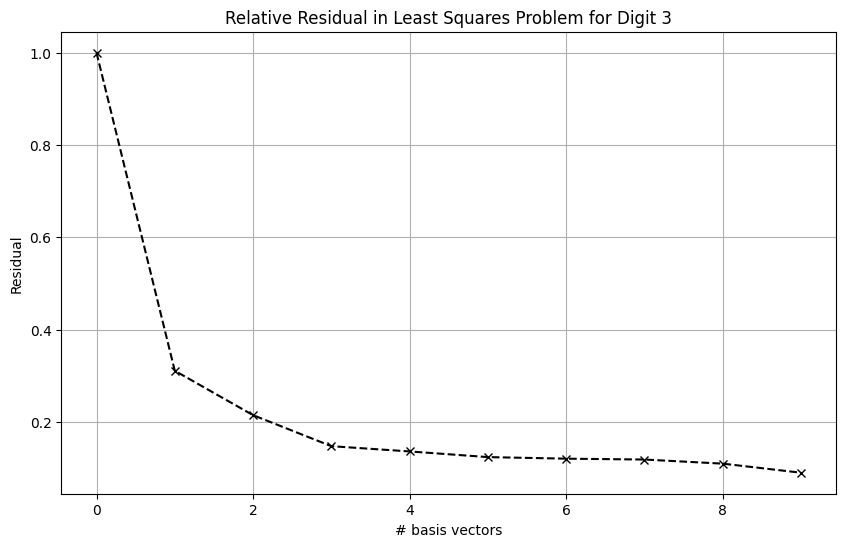

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming U_list contains the list of U matrices for all digits
# and x_train_list contains the training samples for all digits

# Select the U matrix for the digit '3' and the number of terms to consider
k = 3  # Assuming digit 3
r_values = [0,1,2,3,4, 5,6, 7,8, 9]

# Calculate the relative residuals for each term value
relative_residuals = []
for r in r_values:
    U_r = U_list[k][:, :r]
    Ut_r = U_r.T
    I_minus_UUt = np.eye(U_r.shape[0]) - np.dot(U_r, Ut_r)
    z = x_train_list[k][:, 0]  # Taking the first sample for digit 3
    residual = np.linalg.norm(np.dot(I_minus_UUt, z))**2 / np.linalg.norm(z)**2
    relative_residuals.append(residual)

# Plotting the relative residuals
plt.figure(figsize=(10, 6))
plt.plot(r_values, relative_residuals, 'kx--')
plt.xlabel('# basis vectors')
plt.ylabel('Residual')
plt.title('Relative Residual in Least Squares Problem for Digit 3')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Accuracy for Training Set
mse_train = np.array(mse_train).reshape(40, -1)  # Reshape the MSE values

# Calculate the corresponding accuracy for each r
accuracy_train = 1 - mse_train / np.var(y_train)

# Calculate the final accuracy for the training set
final_accuracy_train = np.mean(accuracy_train)

# Calculate Accuracy for Test Set
mse_test = np.array(mse_test).reshape(40, -1)  # Reshape the MSE values

# Calculate the corresponding accuracy for each r
accuracy_test = 1 - mse_test / np.var(y_test)

# Calculate the final accuracy for the test set
final_accuracy_test = np.mean(accuracy_test)

print(f"Final Accuracy for Training Set: {final_accuracy_train}")
print(f"Final Accuracy for Test Set: {final_accuracy_test}")

Final Accuracy for Training Set: 0.9953080134063613
Final Accuracy for Test Set: 0.9416907349937648


# truncated SVD for 10 components

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD to the training data to obtain the bases
svd = TruncatedSVD(n_components=64)  # We have 64 features in the digits dataset
svd.fit(X_train)

# Select the top 'r' bases
r = 10  # Number of bases to select
U_r = svd.components_[:r].T  # Transpose to get the bases as columns

# Project the training and test data onto the selected bases
X_train_projected = np.dot(X_train, U_r)
X_test_projected = np.dot(X_test, U_r)

# Classify the test data using the least squares method
y_pred = []
for x_test in X_test_projected:
    # Calculate the residuals for each digit class
    residuals = []
    for digit in range(10):
        # Get the mean of the projected training data for the current digit
        mean_projected_train = np.mean(X_train_projected[y_train == digit], axis=0)
        # Calculate the residual
        residual = np.linalg.norm(x_test - mean_projected_train)
        residuals.append(residual)
    # The class with the smallest residual is the predicted class
    y_pred.append(np.argmin(residuals))

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.875



# confusion matrix and plot singular values for truncated SVD



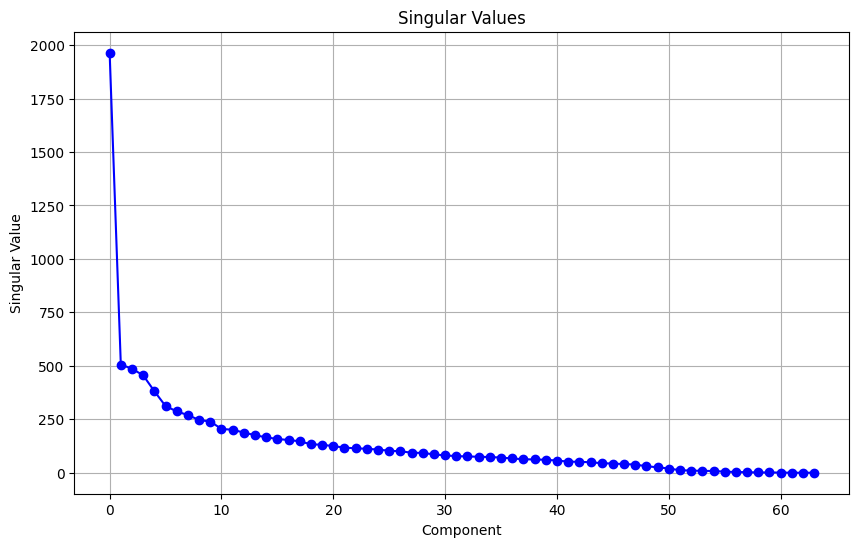

Accuracy: 0.875


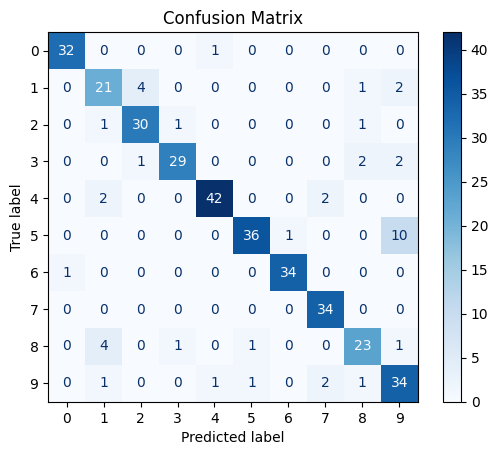

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD to the training data to obtain the bases
svd = TruncatedSVD(n_components=64)  # We have 64 features in the digits dataset
X_train_svd = svd.fit_transform(X_train)

# Visualize the singular values
plt.figure(figsize=(10, 6))
plt.plot(svd.singular_values_, 'bo-')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

# Select the top 'r' components
r = 10  # Number of components to select
U_r = svd.components_[:r]

# Project the training and test data onto the selected components
X_train_projected = np.dot(X_train, U_r.T)
X_test_projected = np.dot(X_test, U_r.T)

# Classify the test data using the least squares method
y_pred = []
for x_test in X_test_projected:
    # Calculate the residuals for each digit class
    residuals = []
    for digit in range(10):
        # Get the mean of the projected training data for the current digit
        mean_projected_train = np.mean(X_train_projected[y_train == digit], axis=0)
        # Calculate the residual
        residual = np.linalg.norm(x_test - mean_projected_train)
        residuals.append(residual)
    # The class with the smallest residual is the predicted class
    y_pred.append(np.argmin(residuals))

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Project Documentation: Digit Recognition using Singular Value Decomposition (SVD)

## Overview
This project aims to recognize handwritten digits using Singular Value Decomposition (SVD) for dimensionality reduction and least squares classification. The dataset used is the MNIST digits dataset, which contains 8x8 pixel images of digits. The project involves preprocessing the data, applying SVD for feature extraction, and classifying the digits using a least squares approach.

## Dataset
The dataset used is the MNIST digits dataset, which contains 8x8 pixel images of digits. The dataset is split into a training set and a test set with a test size of 20%.

## Methodology

### 1. Data Preprocessing
- The dataset is loaded and split into training and testing sets using `train_test_split` from `sklearn.model_selection`.

### 2. Singular Value Decomposition (SVD)
- SVD is applied to the training data to obtain the bases. The number of components is set to 64, which is the number of features in the dataset.
- The singular values are visualized to understand the importance of each component.

### 3. Feature Extraction
- The top 'r' components are selected for feature extraction. In this project, 'r' is set to 10.
- The training and test data are projected onto the selected components.

### 4. Classification
- The test data is classified using the least squares method. For each test sample, the residuals are calculated for each digit class.
- The class with the smallest residual is chosen as the predicted class.

### 5. Evaluation
- The accuracy of the classifier is calculated using `accuracy_score` from `sklearn.metrics`.
- A confusion matrix is computed and displayed to visualize the performance of the classifier.

## Results
- The accuracy of the classifier is printed.
- The confusion matrix is displayed to show the performance of the classifier on each digit class.

## Conclusion
This project demonstrates the use of SVD for dimensionality reduction and least squares classification for digit recognition. The results show the effectiveness of the approach in recognizing handwritten digits. The confusion matrix provides insights into the performance of the classifier on each digit class.

## Future Work
- Experiment with different values of 'r' to find the optimal number of components for feature extraction.
- Explore other classification methods and compare their performance with the least squares approach.
- Use more complex datasets to test the robustness of the approach.



# KNeighborsClassifier

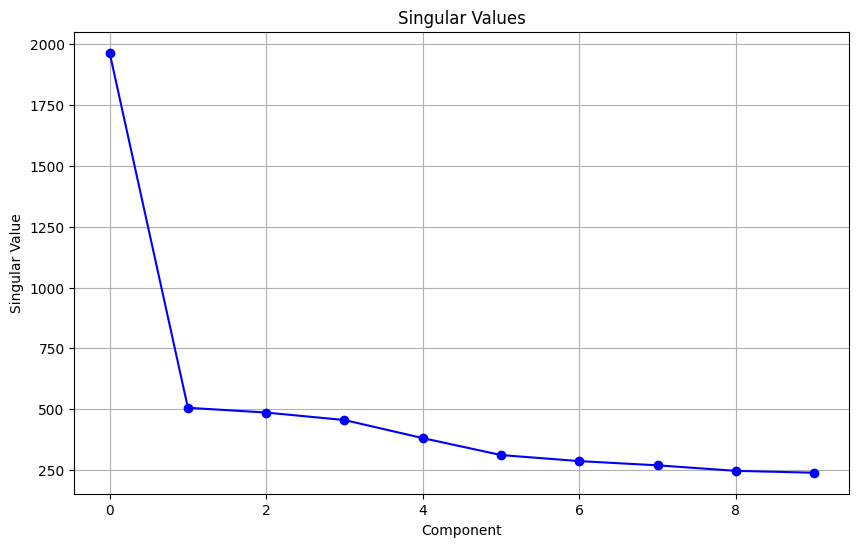

Accuracy: 0.9777777777777777


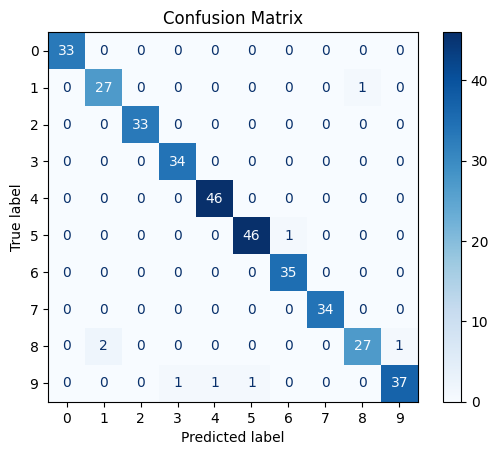

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD to the training data to obtain the bases
svd = TruncatedSVD(n_components=10)  # Reduced number of components
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Visualize the singular values
plt.figure(figsize=(10, 6))
plt.plot(svd.singular_values_, 'bo-')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

# Use a more robust classifier (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_svd, y_train)

# Predict the test data
y_pred = knn.predict(X_test_svd)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# KNeighborsClassifier

Test Accuracy: 0.9777777777777777
Train Accuracy: 0.9860821155184412


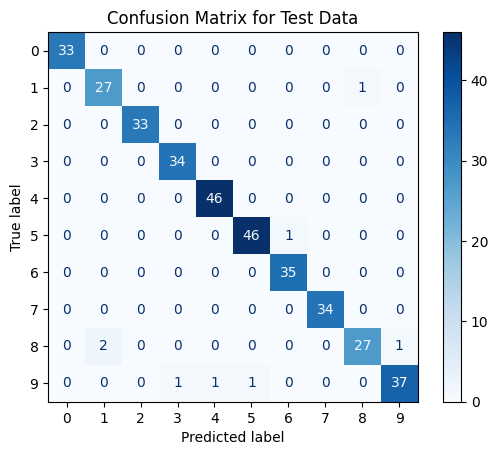

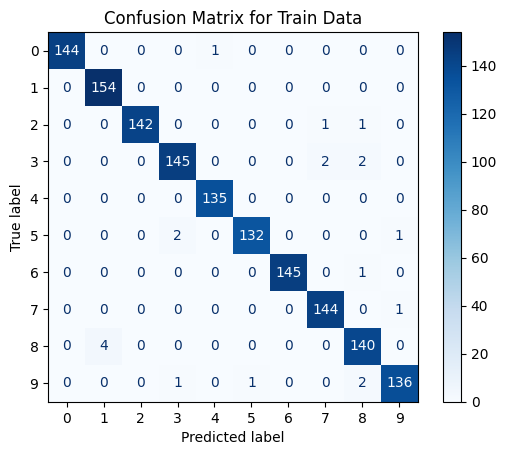

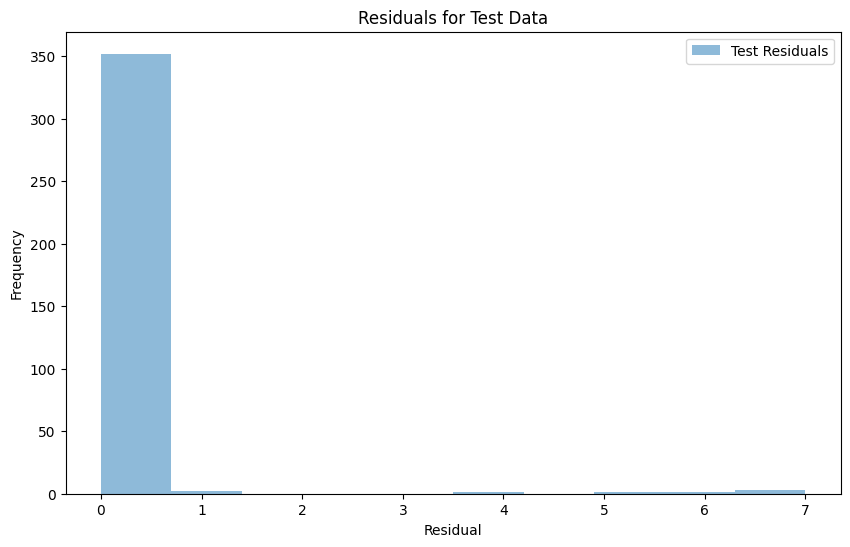

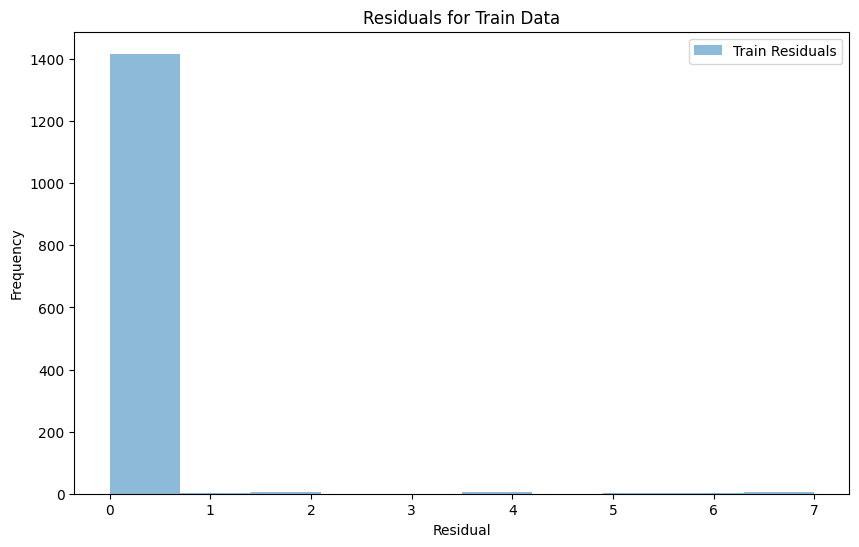

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD to the training data to obtain the bases
svd = TruncatedSVD(n_components=10)  # Reduced number of components
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Use a more robust classifier (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_svd, y_train)

# Predict the test data
y_pred_test = knn.predict(X_test_svd)

# Predict the train data
y_pred_train = knn.predict(X_train_svd)

# Calculate the accuracy of the classifier for test and train sets
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy: {accuracy_test}")
print(f"Train Accuracy: {accuracy_train}")

# Compute and display the confusion matrix for test data
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=digits.target_names)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute and display the confusion matrix for train data
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=digits.target_names)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Train Data')
plt.show()

# Calculate residuals for test and train data
residuals_test = np.abs(y_test - y_pred_test)
residuals_train = np.abs(y_train - y_pred_train)

# Plot residuals for test data
plt.figure(figsize=(10, 6))
plt.hist(residuals_test, bins=10, alpha=0.5, label='Test Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals for Test Data')
plt.legend()
plt.show()

# Plot residuals for train data
plt.figure(figsize=(10, 6))
plt.hist(residuals_train, bins=10, alpha=0.5, label='Train Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals for Train Data')
plt.legend()
plt.show()


1. **Loading the Digits**: We have a collection of pictures of numbers from 0 to 9, called the "digits dataset". Each picture is like a tiny drawing of a number.

2. **Splitting the Pictures**: We split these pictures into two groups: one for learning (training set) and one for testing (testing set). This is like having some examples to learn from and some to check how well we've learned.

3. **Making the Pictures Simpler**: We use a method called "Singular Value Decomposition" (SVD) to make the pictures simpler. It's like taking a colorful picture and turning it into a simpler black and white drawing. We choose only the most important parts (components) of the drawing.

4. **Learning from the Simple Pictures**: We use a method called "K-Nearest Neighbors" (KNN) to learn from the simpler drawings. KNN is like looking at the drawings and finding the most similar ones to guess what number it is.

5. **Testing What We Learned**: We then use the simpler drawings from the testing set to see how well we can guess the numbers. We check how many we got right and how many we got wrong.

6. **Checking Our Performance**: We make two charts: one shows how many times we guessed each number right and wrong for the testing set, and another for the training set. We also look at how far off our guesses were from the real numbers (residuals) and make a bar chart to see how often we were off by different amounts.

So, in simple terms, we're teaching a computer to recognize numbers by showing it simplified pictures and then testing it to see how well it can guess the numbers in new pictures.

# SVC(support vector machine)

Accuracy on the test set: 0.9861111111111112


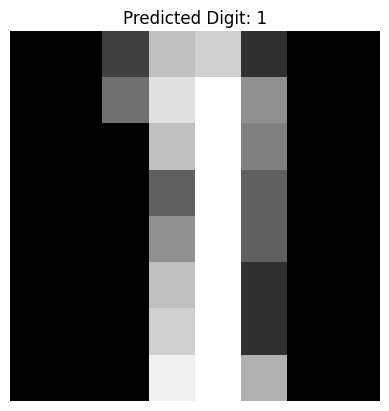

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Classifier
svm = SVC()
svm.fit(X_train, y_train)

# Pick a test image index to classify
test_index = 10
test_image = X_test[test_index].reshape(1, -1)  # reshape the test image to match the classifier's input shape

# Classify the test image
predicted_digit = svm.predict(test_image)

# Evaluate the accuracy on the test set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')

# Display the test image and the predicted digit
plt.figure()
plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit[0]}')
plt.axis('off')
plt.show()